## **1. Import required Libraries** 

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## **2. Load the Data** 

In [105]:
df = pd.read_csv(r"C:\Users\shiva\OneDrive\Desktop\mldata.csv")
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading_and_writing skills,memory capability score,Interested_subjects,career_area,Type_of_company_want_to_settle_in,Taken inputs from seniors or elders,Interested_Type_of_Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Series,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Autobiographies,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Travel,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Guide,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Health,Technical,hard worker,yes,no,Applications Developer


In [37]:
print('The shape of our training set: %s professionals and %s features'%(df.shape[0],df.shape[1]))

The shape of our training set: 6901 professionals and 20 features


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Logical quotient rating              6901 non-null   int64 
 1   hackathons                           6901 non-null   int64 
 2   coding skills rating                 6901 non-null   int64 
 3   public speaking points               6901 non-null   int64 
 4   self-learning capability?            6901 non-null   object
 5   Extra-courses did                    6901 non-null   object
 6   certifications                       6901 non-null   object
 7   workshops                            6901 non-null   object
 8   reading_and_writing skills           6901 non-null   object
 9   memory capability score              6901 non-null   object
 10  Interested_subjects                  6901 non-null   object
 11  interested_career_area               6901 n

## **3. Data Preprocessing** 

In [39]:
print("Columns in our dataset: " , df.columns)

Columns in our dataset:  Index(['Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'self-learning capability?',
       'Extra-courses did', 'certifications', 'workshops',
       'reading_and_writing skills', 'memory capability score',
       'Interested_subjects', 'interested_career_area ',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'Interested Type of Books',
       'Management or Technical', 'hard/smart worker', 'worked in teams ever?',
       'Introvert', 'Suggested Job Role'],
      dtype='object')


In [40]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())

List of Numerical features: 
 ['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points']


List of Categorical features: 
 ['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading_and_writing skills', 'memory capability score', 'Interested_subjects', 'interested_career_area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


### (1) Checking Missing Values

In [41]:
df.isnull().sum(axis=0)

Logical quotient rating                0
hackathons                             0
coding skills rating                   0
public speaking points                 0
self-learning capability?              0
Extra-courses did                      0
certifications                         0
workshops                              0
reading_and_writing skills             0
memory capability score                0
Interested_subjects                    0
interested_career_area                 0
Type of company want to settle in?     0
Taken inputs from seniors or elders    0
Interested Type of Books               0
Management or Technical                0
hard/smart worker                      0
worked in teams ever?                  0
Introvert                              0
Suggested Job Role                     0
dtype: int64

**Observation: No missing values.**

### (2) Checking Distinct Values for Categorical Features

In [42]:
categorical_col = df[['self-learning capability?', 'Extra-courses did','reading_and_writing skills', 'memory capability score', 
                      'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 
                      'Introvert', 'interested_career_area ']]
for i in categorical_col:
    print(df[i].value_counts(), end="\n\n")

yes    3496
no     3405
Name: self-learning capability?, dtype: int64

no     3529
yes    3372
Name: Extra-courses did, dtype: int64

excellent    2328
medium       2315
poor         2258
Name: reading_and_writing skills, dtype: int64

medium       2317
excellent    2303
poor         2281
Name: memory capability score, dtype: int64

yes    3501
no     3400
Name: Taken inputs from seniors or elders, dtype: int64

Management    3461
Technical     3440
Name: Management or Technical, dtype: int64

smart worker    3523
hard worker     3378
Name: hard/smart worker, dtype: int64

no     3470
yes    3431
Name: worked in teams ever?, dtype: int64

yes    3544
no     3357
Name: Introvert, dtype: int64

system developer            1178
security                    1177
Business process analyst    1154
developer                   1145
testing                     1128
cloud computing             1119
Name: interested_career_area , dtype: int64



**Observations**
* The categorical features with yes or no can be made numerical easily using binary encoding.

### (3) Checking Data Balancing for Classification

<AxesSubplot:xlabel='Suggested Job Role', ylabel='count'>

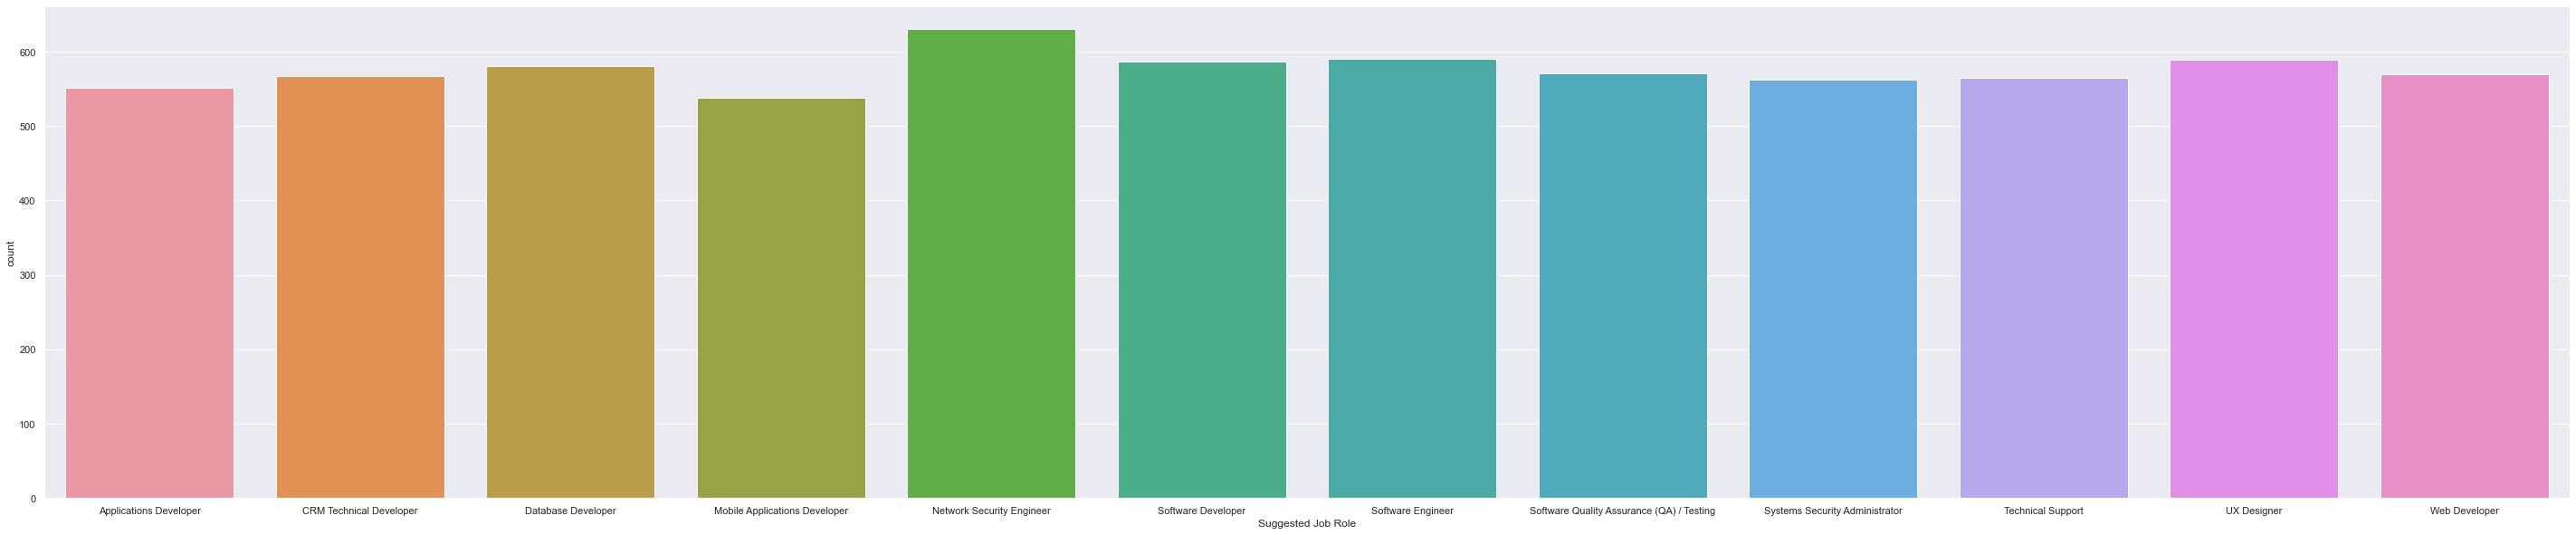

In [43]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = df["Suggested Job Role"])

## **4. Exploratory Data Analysis** 

### (1) Correlation Between Numerical Features

<AxesSubplot:>

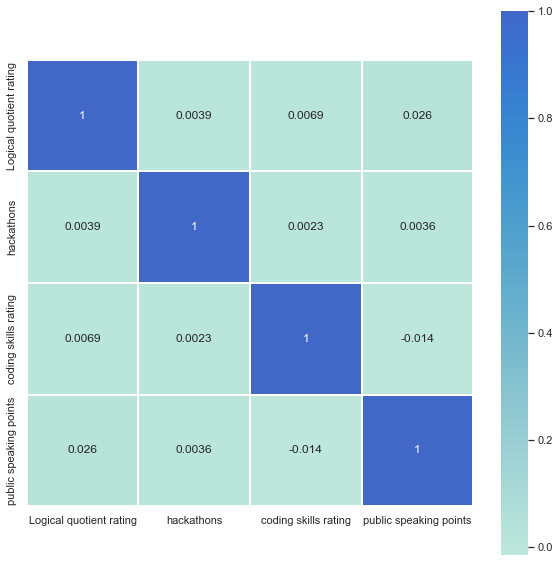

In [44]:
corr = df[['Logical quotient rating', 'hackathons', 
           'coding skills rating', 'public speaking points']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

**No highly corelated numerical pair found.**

## (b) Visualization for Categorical Variables

In [45]:
print(df["Interested_subjects"].value_counts())

Software Engineering     731
IOT                      722
cloud computing          721
programming              716
networks                 713
Computer Architecture    703
data engineering         672
hacking                  663
Management               644
parallel computing       616
Name: Interested_subjects, dtype: int64


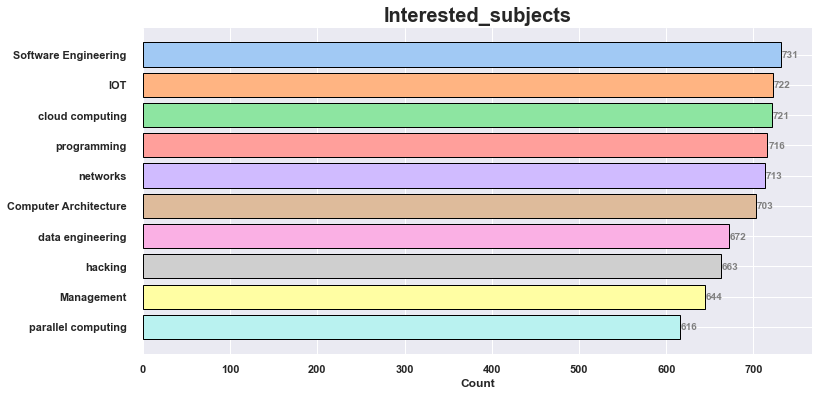

In [46]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Interested_subjects"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested_subjects',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [47]:
print(df["Interested Type of Books"].value_counts())

Guide                    405
Health                   401
Self help                377
Horror                   377
Biographies              219
Science fiction          218
Satire                   212
Childrens                212
Autobiographies          210
Prayer books             207
Fantasy                  205
Journals                 203
Trilogy                  203
Anthology                202
Encyclopedias            201
Drama                    201
Mystery                  200
History                  199
Science                  198
Dictionaries             198
Diaries                  197
Religion-Spirituality    197
Action and Adventure     193
Poetry                   193
Cookbooks                186
Comics                   186
Art                      186
Travel                   186
Series                   180
Math                     176
Romance                  173
Name: Interested Type of Books, dtype: int64


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Logical quotient rating              6901 non-null   int64 
 1   hackathons                           6901 non-null   int64 
 2   coding skills rating                 6901 non-null   int64 
 3   public speaking points               6901 non-null   int64 
 4   self-learning capability?            6901 non-null   object
 5   Extra-courses did                    6901 non-null   object
 6   certifications                       6901 non-null   object
 7   workshops                            6901 non-null   object
 8   reading_and_writing skills           6901 non-null   object
 9   memory capability score              6901 non-null   object
 10  Interested_subjects                  6901 non-null   object
 11  interested_career_area               6901 n

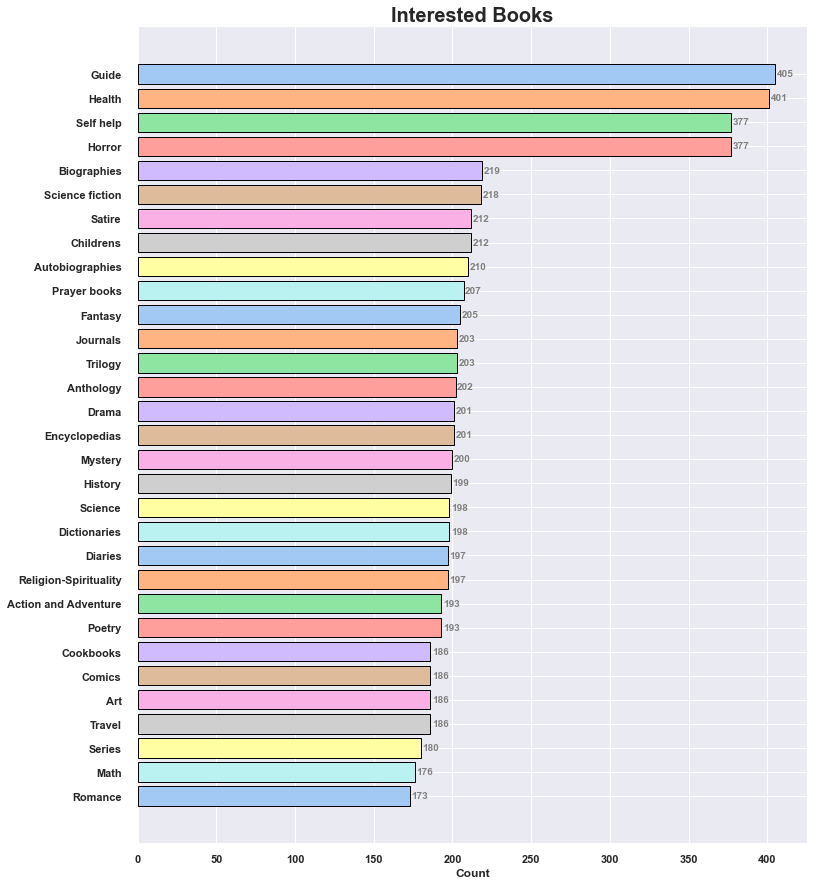

In [49]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,15))

# Horizontal Bar Plot
title_cnt=df["Interested Type of Books"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested Books',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [50]:
print(df["certifications"].value_counts())

r programming           803
information security    785
shell programming       783
machine learning        783
full stack              768
hadoop                  764
python                  756
distro making           740
app development         719
Name: certifications, dtype: int64


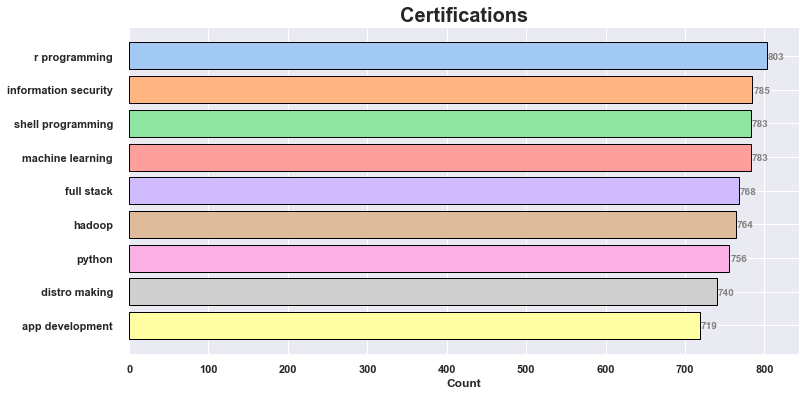

In [51]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df.certifications.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Certifications',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [52]:
print(df["workshops"].value_counts())

database security    897
system designing     891
web technologies     891
hacking              867
testing              852
data science         842
game development     831
cloud computing      830
Name: workshops, dtype: int64


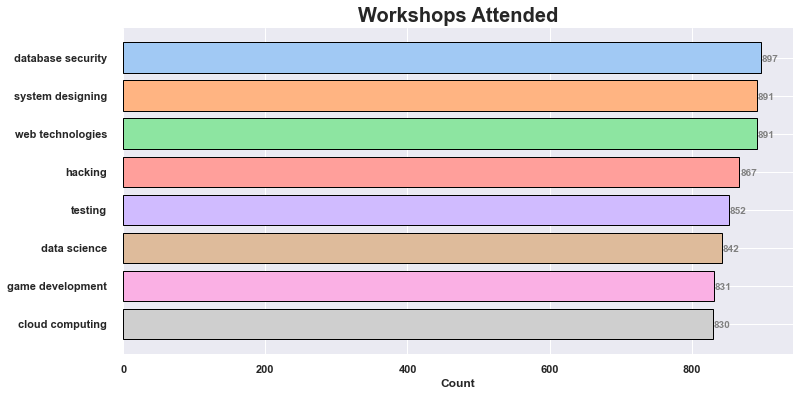

In [53]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df.workshops.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Workshops Attended',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [54]:
print(df["Type of company want to settle in?"].value_counts())

Service Based                        725
Web Services                         719
BPA                                  711
Testing and Maintainance Services    698
Product based                        695
Finance                              694
Cloud Services                       692
product development                  669
Sales and Marketing                  658
SAaS services                        640
Name: Type of company want to settle in?, dtype: int64


KeyError: 'Type of company want to settle in?'

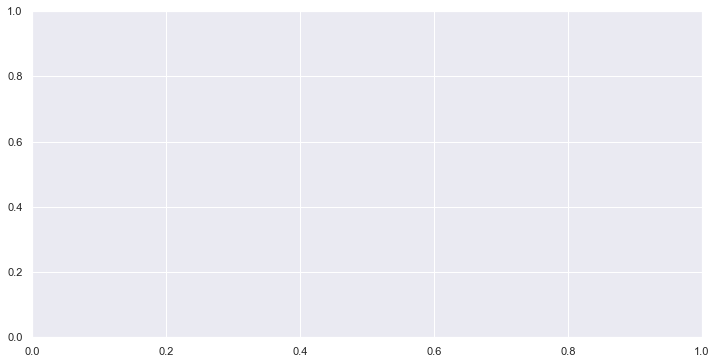

In [97]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Type of company want to settle in?"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Type of Company you want to settle in?',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [96]:
print(df["career_area "].value_counts())

system developer            1178
security                    1177
Business process analyst    1154
developer                   1145
testing                     1128
cloud computing             1119
Name: career_area , dtype: int64


In [92]:
df.c

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading_and_writing skills,memory capability score,...,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role,certifications_code,workshops_code,Interested_subjects_code,career_area _code,Type_of_company_want_to_settle_in_code,Interested_Type_of_Books_code
0,5,0,6,2,yes,no,information security,testing,0,0,...,smart worker,yes,no,Applications Developer,4,6,9,5,0,28
1,7,6,4,3,no,yes,shell programming,testing,2,1,...,hard worker,no,yes,Applications Developer,8,6,2,4,1,3
2,2,3,9,1,no,yes,information security,testing,2,0,...,smart worker,no,no,Applications Developer,4,6,5,0,9,29
3,2,6,3,5,no,yes,r programming,database security,2,0,...,smart worker,yes,yes,Applications Developer,7,2,7,5,7,13
4,2,0,3,4,yes,no,distro making,game development,2,1,...,hard worker,yes,no,Applications Developer,1,3,3,4,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,7,5,6,2,yes,no,shell programming,hacking,0,0,...,smart worker,no,yes,Web Developer,8,4,3,5,7,30
6897,6,5,1,8,no,no,machine learning,hacking,2,2,...,hard worker,no,no,Web Developer,5,4,9,5,7,25
6898,5,1,6,7,yes,no,distro making,data science,0,0,...,hard worker,yes,no,Web Developer,1,1,1,4,1,27
6899,1,6,4,6,no,no,app development,game development,0,2,...,smart worker,no,yes,Web Developer,0,3,5,2,4,10


In [57]:
print(df["Interested_subjects"].value_counts())

Software Engineering     731
IOT                      722
cloud computing          721
programming              716
networks                 713
Computer Architecture    703
data engineering         672
hacking                  663
Management               644
parallel computing       616
Name: Interested_subjects, dtype: int64


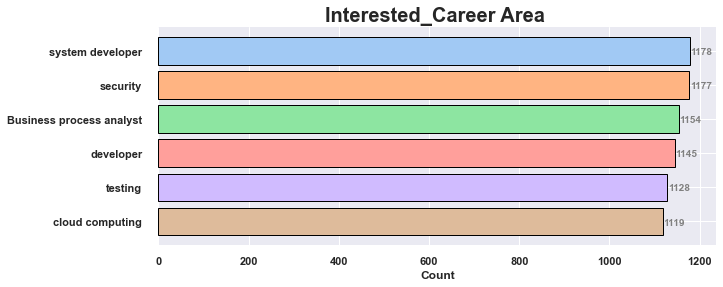

In [58]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,4)) #width,height

# Horizontal Bar Plot
title_cnt=df["interested_career_area "].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('pastel',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Interested_Career Area ',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

## **5. Feature Engineering** 

### (1) Binary Encoding for Categorical Variables

In [98]:
cols = df[["self-learning capability?", "Extra-courses did","Taken inputs from seniors or elders", "worked in teams ever?", "Introvert"]]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    df = df.replace(cleanup_nums)

In [60]:
print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['certifications', 'workshops', 'reading_and_writing skills', 'memory capability score', 'Interested_subjects', 'interested_career_area ', 'Type of company want to settle in?', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


### (2) Number Encoding for Categorical 

In [108]:
mycol = df[["reading_and_writing skills", "memory capability score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    df = df.replace(cleanup_nums)

category_cols = df[['certifications', 'workshops', 'Interested_subjects', 'career_area', 'Type_of_company_want_to_settle_in', 
                    'Interested_Type_of_Books']]
for i in category_cols:
    df[i] = df[i].astype('category')
    df[i + "_code"] = df[i].cat.codes
    

print("\n\nList of Categorical features: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['self-learning capability?', 'Extra-courses did', 'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


### (3) Dummy Variable Encoding

In [62]:
print(df['Management or Technical'].unique())
print(df['hard/smart worker'].unique())

['Management' 'Technical']
['smart worker' 'hard worker']


In [63]:
df = pd.get_dummies(df, columns=["Management or Technical", "hard/smart worker"], prefix=["A", "B"])
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading_and_writing skills,memory capability score,...,certifications_code,workshops_code,Interested_subjects_code,interested_career_area _code,Type of company want to settle in?_code,Interested Type of Books_code,A_Management,A_Technical,B_hard worker,B_smart worker
0,5,0,6,2,1,0,information security,testing,0,0,...,4,6,9,5,0,28,1,0,0,1
1,7,6,4,3,0,1,shell programming,testing,2,1,...,8,6,2,4,1,3,0,1,1,0
2,2,3,9,1,0,1,information security,testing,2,0,...,4,6,5,0,9,29,0,1,0,1
3,2,6,3,5,0,1,r programming,database security,2,0,...,7,2,7,5,7,13,1,0,0,1
4,2,0,3,4,1,0,distro making,game development,2,1,...,1,3,3,4,0,14,0,1,1,0


In [103]:
df.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading_and_writing skills,memory capability score,...,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role,certifications_code,workshops_code,Interested_subjects_code,career_area _code,Type_of_company_want_to_settle_in_code,Interested_Type_of_Books_code
0,5,0,6,2,1,0,information security,testing,0,0,...,smart worker,1,0,Applications Developer,4,6,9,5,0,28
1,7,6,4,3,0,1,shell programming,testing,2,1,...,hard worker,0,1,Applications Developer,8,6,2,4,1,3
2,2,3,9,1,0,1,information security,testing,2,0,...,smart worker,0,0,Applications Developer,4,6,5,0,9,29
3,2,6,3,5,0,1,r programming,database security,2,0,...,smart worker,1,1,Applications Developer,7,2,7,5,7,13
4,2,0,3,4,1,0,distro making,game development,2,1,...,hard worker,1,0,Applications Developer,1,3,3,4,0,14


In [109]:
df.career_area_code.unique()


array([5, 4, 0, 3, 2, 1], dtype=int8)

In [87]:
df.I.unique()

array([0, 1, 9, 7, 4, 8, 2, 5, 3, 6], dtype=int8)

In [66]:
df.in.unique()

['programming', 'Management', 'data engineering', 'networks', 'Software Engineering', 'cloud computing', 'parallel computing', 'IOT', 'Computer Architecture', 'hacking']
Categories (10, object): ['Computer Architecture', 'IOT', 'Management', 'Software Engineering', ..., 'hacking', 'networks', 'parallel computing', 'programming']

In [67]:
data = {'interested subject': ['programming', 'Management', 'data engineering', 'networks', 'Software Engineering', 'cloud computing', 
                               'parallel computing', 'IOT', 'Computer Architecture', 'hacking']
        }
dq = pd.DataFrame(data)

In [68]:
df = pd.DataFrame(df)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Logical quotient rating                  6901 non-null   int64   
 1   hackathons                               6901 non-null   int64   
 2   coding skills rating                     6901 non-null   int64   
 3   public speaking points                   6901 non-null   int64   
 4   self-learning capability?                6901 non-null   int64   
 5   Extra-courses did                        6901 non-null   int64   
 6   certifications                           6901 non-null   category
 7   workshops                                6901 non-null   category
 8   reading_and_writing skills               6901 non-null   int64   
 9   memory capability score                  6901 non-null   int64   
 10  Interested_subjects                 

In [70]:
df.certifications_code.unique()

array([4, 8, 7, 1, 5, 2, 3, 0, 6], dtype=int8)

In [78]:
df..unique()

array([28,  3, 29, 13, 14, 17,  1,  9, 21,  2, 11, 22,  0,  6, 16, 24, 27,
       15,  7, 18,  4, 10,  8, 26, 20, 23, 25, 30, 12,  5, 19], dtype=int8)

In [80]:
df.Interested_subjects.unique()

['programming', 'Management', 'data engineering', 'networks', 'Software Engineering', 'cloud computing', 'parallel computing', 'IOT', 'Computer Architecture', 'hacking']
Categories (10, object): ['Computer Architecture', 'IOT', 'Management', 'Software Engineering', ..., 'hacking', 'networks', 'parallel computing', 'programming']

In [83]:
a=df.Interested_Type_of_Books.unique()
print(a)

['Series', 'Autobiographies', 'Travel', 'Guide', 'Health', ..., 'Science', 'Trilogy', 'Fantasy', 'Childrens', 'Mystery']
Length: 31
Categories (31, object): ['Action and Adventure', 'Anthology', 'Art', 'Autobiographies', ..., 'Self help', 'Series', 'Travel', 'Trilogy']


In [ ]:
df.certifications.unique()

In [ ]:
data = {'no': [9, 2, 5, 7, 3, 4, 8, 1, 0, 6],
        'interested sub': ['programming', 'Management', 'data engineering', 'networks', 'Software Engineering', 'cloud computing', 'parallel computing', 
                  'IOT', 'Computer Architecture', 'hacking']
        }
dq = pd.DataFrame(data)
print(dq)


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   Logical quotient rating                  6901 non-null   int64   
 1   hackathons                               6901 non-null   int64   
 2   coding skills rating                     6901 non-null   int64   
 3   public speaking points                   6901 non-null   int64   
 4   self-learning capability?                6901 non-null   int64   
 5   Extra-courses did                        6901 non-null   int64   
 6   certifications                           6901 non-null   category
 7   workshops                                6901 non-null   category
 8   reading_and_writing skills               6901 non-null   int64   
 9   memory capability score                  6901 non-null   int64   
 10  Interested_subjects                 

In [106]:
df.career_area.unique()


AttributeError: 'DataFrame' object has no attribute 'career_area_code'

In [ ]:
df.Interested_subjects.unique()

In [ ]:
df.Interested_subjects_code

In [72]:
df.workshops.unique()


['testing', 'database security', 'game development', 'data science', 'system designing', 'hacking', 'cloud computing', 'web technologies']
Categories (8, object): ['cloud computing', 'data science', 'database security', 'game development', 'hacking', 'system designing', 'testing', 'web technologies']

In [75]:
df.Interested Type of Books_code.unique()



SyntaxError: invalid syntax (3785483489.py, line 1)

In [ ]:
data = {'no assign': [6, 2, 3, 1, 5, 4, 0, 7],
        'workshop': ['testing', 'database security', 'game development', 'data science', 'system designing', 'hacking',
                  'cloud computing', 'web technologies']
        }
dq = pd.DataFrame(data)
print(dq)


In [ ]:
print("List of Numerical features: \n" , df.select_dtypes(include=np.number).columns.tolist())

## **6. Building Machine Learning Model** 🤖

In [ ]:
feed = df[['Logical quotient rating', 'coding skills rating', 'hackathons', 'public speaking points', 'self-learning capability?','Extra-courses did', 
           'Taken inputs from seniors or elders', 'worked in teams ever?', 'Introvert', 'reading and writing skills', 'memory capability score',  
           'B_hard worker', 'B_smart worker', 'A_Management', 'A_Technical', 'Interested subjects_code', 'Interested Type of Books_code', 'certifications_code', 
           'workshops_code', 'Type of company want to settle in?_code',  'interested career area _code',
             'Suggested Job Role']]

# Taking all independent variable columns
df_train_x = feed.drop('Suggested Job Role',axis = 1)

# Target variable column
df_train_y = feed['Suggested Job Role']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)


In [ ]:
df.Interested subjects_code

In [ ]:
print(feed.value_counts())

### **(1) Decision Tree Classifier**

In [ ]:
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
y_pred1 = dtree.predict(x_train)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)

print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)

In [ ]:
accuracy1 = accuracy_score(y_train,y_pred1)

In [ ]:
print("accuracy=",accuracy1)

### **Predicting class for one instance**

In [ ]:
userdata = [['4','12','2','8','3','5','3', '2', '11', '1', '3', '6','8', 
                    '7','5','7','4','5','6','8','2']]
ynewclass = dtree.predict(userdata)
ynew = dtree.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

### **(2) Supprt Vector Machine Classifier**

In [ ]:
svm = svm.SVC()
svm.fit(x_train, y_train)
svm_y_pred = svm.predict(x_test)
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)
print("confusion matrics=",svm_cm)
print("  ")
print("accuracy=",svm_accuracy*10)

In [ ]:
clf=RandomForestClassifier()
clf.fit(x_train, y_train)
clf_y_pred = clf.predict(x_test)
clf_cm = confusion_matrix(y_test,clf_y_pred)
clf_accuracy = accuracy_score(y_test,clf_y_pred)
print("confusion matrics=",clf_cm)
print("  ")
print("accuracy=",clf_accuracy
     )

In [ ]:
ynewclass = svm.predict(userdata)
ynew = svm.decision_function(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

### **(3) Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(random_state = 10)
rf.fit(x_train, y_train)
rfc_y_pred = rf.predict(x_test)
rfc_cm = confusion_matrix(y_test,rfc_y_pred)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred)
print("confusion matrics=",rfc_cm)
print("  ")
print("accuracy=",rfc_accuracy)

In [ ]:

ynewclass = rf.predict(userdata)
ynew = rf.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

### 4) XGB

### **Prediction for one instance**

In [ ]:
userdata = [['4','12','2','8','3','5','3', '2', '11', '1', '3', '6','8', 
                    '7','5','7','4','5','6','8','2']]
ynewclass = dtree.predict(userdata)
ynew = dtree.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

In [ ]:
ynewclass.feature_names = list(X_train.columns.values)

In [ ]:
import pickle 
pickle.dump(dtree,open('weights.pkl','wb'))